### Clustering
What we aim to do here is 
1. Select the non fraud records and train a simple auto encoder on top of it
2. Gather the reconstruction error for the entire dataset
3. Train a clustering model with the only the reconstruction error as a feature to it 
4. Check the performance on testing dataset for model with feature


In [4]:
import json
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from category_encoders import OneHotEncoder
import xgboost as xgb
from sklearn.metrics import average_precision_score
import joblib
import category_encoders as ce
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f"{datetime.now()} AutoEncoder::Status - Training Script Init. Packages loaded")


print(f"{datetime.now()} AutoEncoder::Status - training data read.")
df_train=pd.read_csv('train_with_enc_field.csv')
print(f'Train data size is {df_train.shape}')
print(f"Train data label distribution is {df_train['isFraud'].value_counts()}")


X_train = df_train[['enc_field']]
y_train = df_train['isFraud'] 

print(f"{datetime.now()} AutoEncoder::Status - training data processed.")
print(f'Train data size is {X_train.shape}')

df_test=pd.read_csv('test_enc_field.csv')
X_test = df_test[['enc_field']]
y_test = df_test['isFraud']
print(f"{datetime.now()} AutoEncoder::Status - testing data processed.")
print(f'Test data size is {X_test.shape}')

2023-10-09 22:51:45.790934 AutoEncoder::Status - Training Script Init. Packages loaded
2023-10-09 22:51:45.793082 AutoEncoder::Status - training data read.
Train data size is (120731, 10)
Train data label distribution is isFraud
0    114982
1      5749
Name: count, dtype: int64
2023-10-09 22:51:45.877826 AutoEncoder::Status - training data processed.
Train data size is (120731, 1)
2023-10-09 22:51:45.906813 AutoEncoder::Status - testing data processed.
Test data size is (51742, 1)


In [5]:
knn = KNeighborsClassifier(n_neighbors=2)


knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nClassification Report:")
print(classification_report(y_test, predictions))

print("\nAccuracy Score:")
print(accuracy_score(y_test, predictions))

Confusion Matrix:
[[49277     1]
 [    2  2462]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49278
           1       1.00      1.00      1.00      2464

    accuracy                           1.00     51742
   macro avg       1.00      1.00      1.00     51742
weighted avg       1.00      1.00      1.00     51742


Accuracy Score:
0.9999420200224189


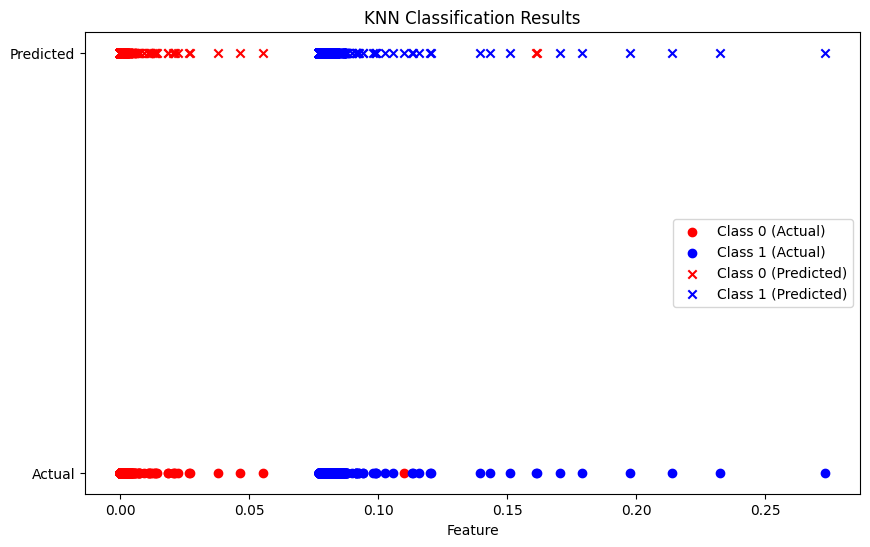

In [7]:
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot the actual classes
plt.scatter(X_test[y_test==0], [0]*sum(y_test==0), color='red', marker='o', label='Class 0 (Actual)')
plt.scatter(X_test[y_test==1], [0]*sum(y_test==1), color='blue', marker='o', label='Class 1 (Actual)')

# Plot the predicted classes slightly above the actual classes for visibility
plt.scatter(X_test[predictions==0], [1]*sum(predictions==0), color='red', marker='x', label='Class 0 (Predicted)')
plt.scatter(X_test[predictions==1], [1]*sum(predictions==1), color='blue', marker='x', label='Class 1 (Predicted)')

# Add labels and a legend
plt.xlabel('Feature')
plt.yticks([0, 1], ['Actual', 'Predicted'])
plt.legend()
plt.title('KNN Classification Results')

# Show the plot
plt.show()